In [23]:
# Instalar la biblioteca pandas, si no está instalada
!pip install pandas

In [24]:
# Importar las bibliotecas necesarias

import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [25]:
# Crear una sesión Spark
# La sesión Spark es el punto de entrada principal para DataFrames y SQL

spark = SparkSession \
    .builder \
    .appName("Ejemplo de DataFrames con Spark en Python") \
    .getOrCreate()


In [26]:
# Verificar la sesión Spark
# Imprimimos el objeto spark para asegurarnos de que la sesión se ha creado correctamente
spark

Ahora ingresamos en
    ---- > **Spark UI** 
    


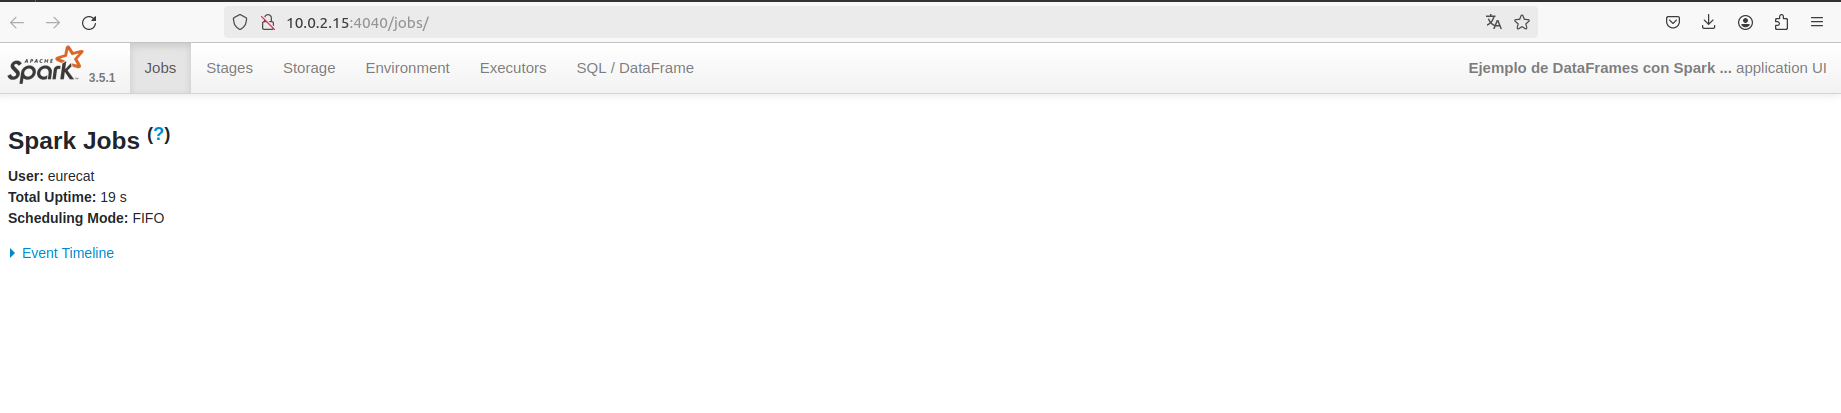


Estmoas en la interfaz de usuario web de Apache Spark.
Esta es una herramienta esencial para monitorear y gestionar aplicaciones de Spark en tiempo real. 

Esta interfaz ofrece una visión detallada del estado y el rendimiento de los trabajos de Spark que se están ejecutando. 

Para más información:
- [Entendiendo la Interfaz de Usuario de Spark](https://medium.com/iwannabedatadriven/entendiendo-la-interfaz-de-usuario-de-spark-web-ui-spark-i-d03c6bd562a5)
- [Monitorización con Spark UI en AWS](https://docs.aws.amazon.com/es_es/glue/latest/dg/monitor-spark-ui.html)



### ¿Cón qué datos vamos a trabjar?

Vamos a trabajar con datos disponibles en Open Data del Ayuntamiento de Barcelona sobre accidentes según causa del conductor gestionados por la Guàrdia Urbana en la ciudad de Barcelona.

- [Enlace del dataset](https://opendata-ajuntament.barcelona.cat/data/es/dataset/accidents_causa_conductor_gu_bcn/resource/5a040155-38b3-4b19-a4b0-c84a0618d363)
- [Descripción de los campos](https://opendata-ajuntament.barcelona.cat/data/es/dataset/accidents_causa_conductor_gu_bcn)



---> Para acceder a mayor información es necesario acceder en:

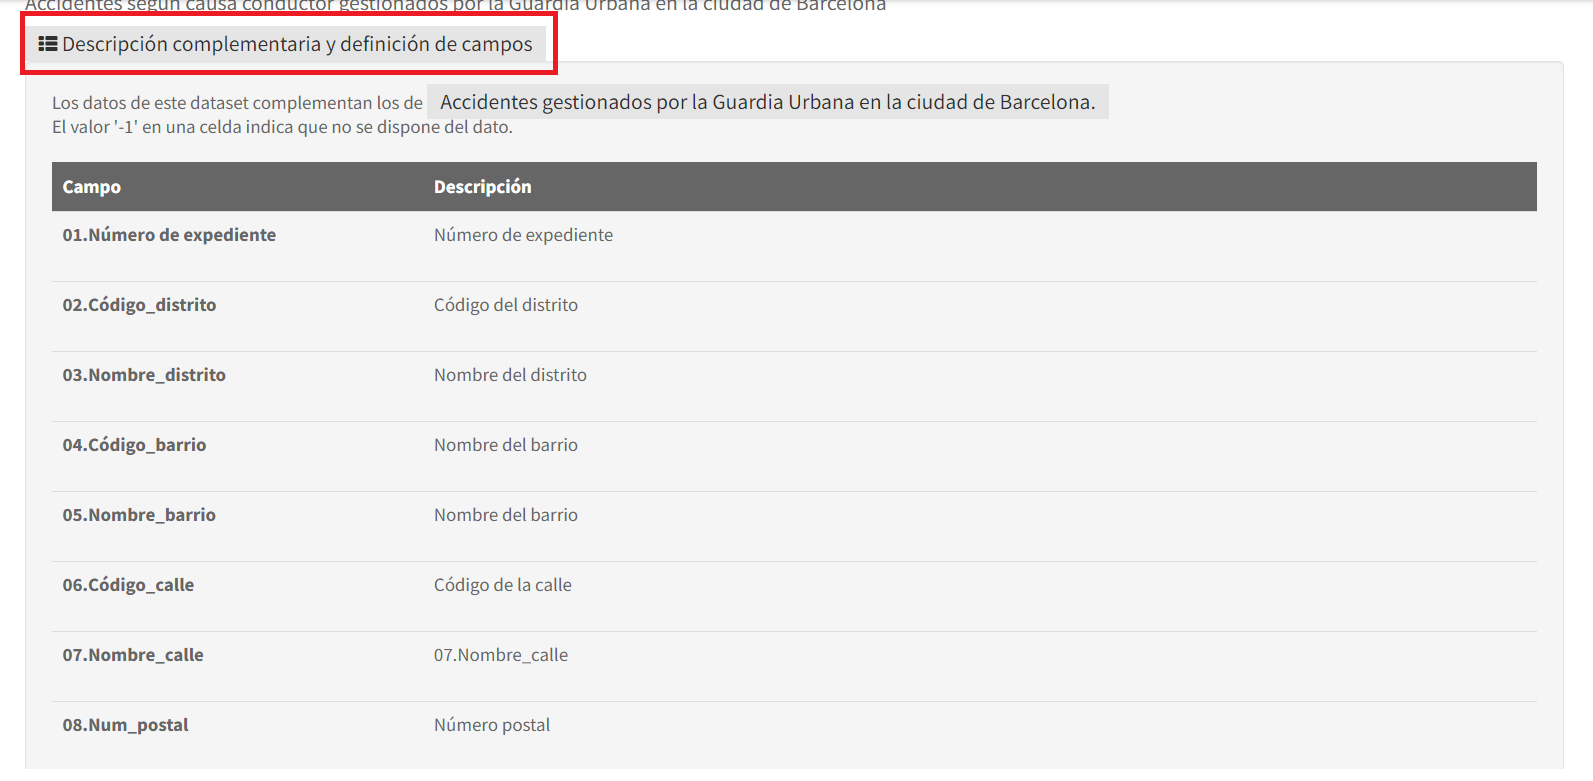

In [27]:
import csv

# Especifica la ruta donde quieres guardar el archivo CSV
file_path = '2023_accidents_causa_conductor_gu_bcn_.csv'

# Leer el archivo CSV en un DataFrame de Pandas
df_barcelona = pd.read_csv(file_path)


In [28]:
# Asegurarse de que los datos se han cargado correctamente en el DataFrame de Pandas
print("Primeras filas del DataFrame de Pandas:")
df_barcelona.head()

Primeras filas del DataFrame de Pandas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84
0,2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Dissabte,2023,2,Febrer,4,16,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783
1,2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,11,Divendres,2023,9,Setembre,1,13,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598
2,2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Divendres,2023,12,Desembre,15,11,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783
3,2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,120,Dissabte,2023,1,Gener,28,14,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762
4,2023S006486,-1,Desconegut,-1,Desconegut,-1,Augusta / Hort de la Vila ...,NaN,Dijous,2023,11,Novembre,2,14,Tarda,Desobeir semàfor,426883.33,4583690.92,2.124189,41.399587


In [29]:
# Convertir el DataFrame de Pandas en un DataFrame de Spark 
sdf = spark.createDataFrame(df_barcelona) 

In [30]:
# Asegurarse de que el DataFrame de Spark se ha creado correctamente
print("Esquema del DataFrame de Spark:")
sdf.printSchema()

Esquema del DataFrame de Spark:
root
 |-- Numero_expedient: string (nullable = true)
 |-- Codi_districte: long (nullable = true)
 |-- Nom_districte: string (nullable = true)
 |-- Codi_barri: long (nullable = true)
 |-- Nom_barri: string (nullable = true)
 |-- Codi_carrer: long (nullable = true)
 |-- Nom_carrer: string (nullable = true)
 |-- Num_postal : string (nullable = true)
 |-- Descripcio_dia_setmana: string (nullable = true)
 |-- NK_Any: long (nullable = true)
 |-- Mes_any: long (nullable = true)
 |-- Nom_mes: string (nullable = true)
 |-- Dia_mes: long (nullable = true)
 |-- Hora_dia: long (nullable = true)
 |-- Descripcio_torn: string (nullable = true)
 |-- Descripcio_causa_mediata: string (nullable = true)
 |-- Coordenada_UTM_X_ED50: double (nullable = true)
 |-- Coordenada_UTM_Y_ED50: double (nullable = true)
 |-- Longitud_WGS84: double (nullable = true)
 |-- Latitud_WGS84: double (nullable = true)



Posibles tipos de datos que podemos encontrar:

| Tipo de Dato | Descripción                                               | Ejemplo                 |
|--------------|-----------------------------------------------------------|-------------------------|
| string       | Cadena de caracteres que puede contener texto o números.  | "Barcelona", "08001"    |
| long         | Número entero largo, útil para identificar elementos.     | 12345, 2021             |
| double       | Número con punto decimal, utilizado para valores precisos.| 41.3851, 2.1734         |


Para más información sobre tipos de datos, consulta: [Spark SQL Data Types](https://spark.apache.org/docs/latest/sql-ref-datatypes.html)


In [31]:
# Mostrar las primeras 5 filas del DataFrame de Spark
sdf.show(5)

+----------------+--------------+-------------+----------+----------+-----------+--------------------+-----------+----------------------+------+-------+--------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+
|Numero_expedient|Codi_districte|Nom_districte|Codi_barri| Nom_barri|Codi_carrer|          Nom_carrer|Num_postal |Descripcio_dia_setmana|NK_Any|Mes_any| Nom_mes|Dia_mes|Hora_dia|Descripcio_torn|Descripcio_causa_mediata|Coordenada_UTM_X_ED50|Coordenada_UTM_Y_ED50|Longitud_WGS84|Latitud_WGS84|
+----------------+--------------+-------------+----------+----------+-----------+--------------------+-----------+----------------------+------+-------+--------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+
| 2023S000699    |            -1|   Desconegut|        -1|Desconegut|         -1|Rovira (ascendent...| 0         |       

### Volvemos a la interfaz de usuario de Apache Spark

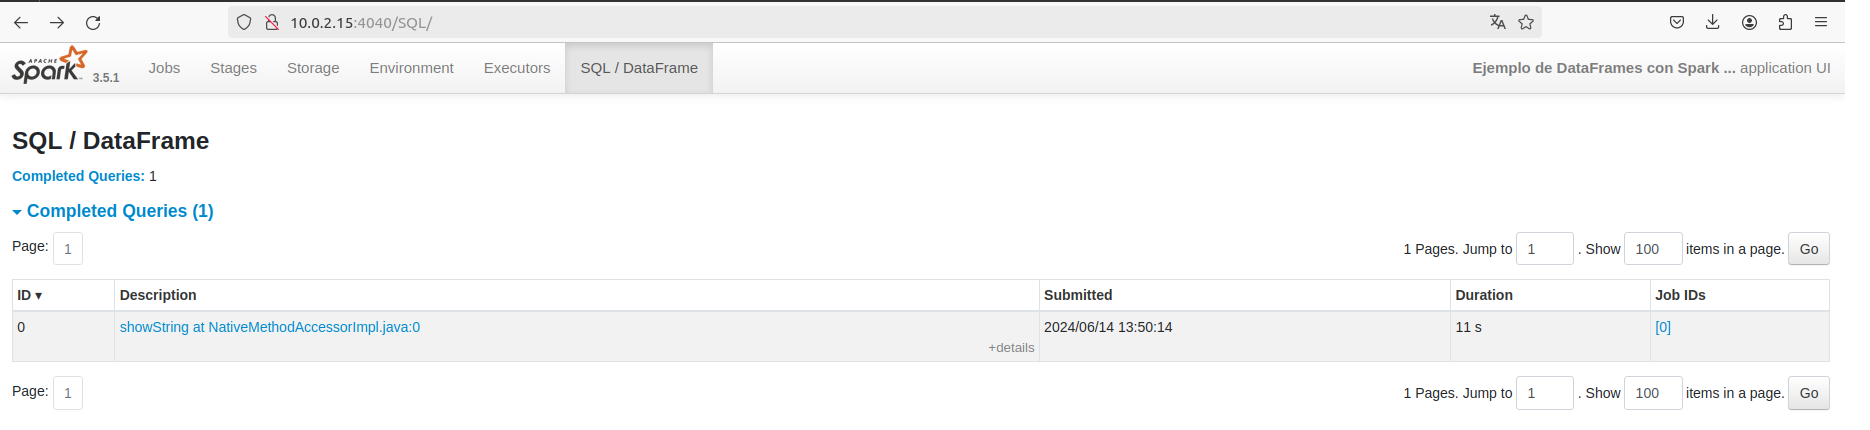

In [32]:
# Utilizamos la función `select()` para seleccionar una columna de datos en particular. Aquí mostramos la columna `Nom_districte`.
sdf.select('Nom_districte').show(20)

+-------------+
|Nom_districte|
+-------------+
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Sant Martí|
|   Sant Martí|
|   Sant Martí|
|   Sant Martí|
|   Sant Martí|
|   Sant Martí|
|   Sant Martí|
+-------------+
only showing top 20 rows



### Volvemos a la interfaz de usuario de Apache Spark

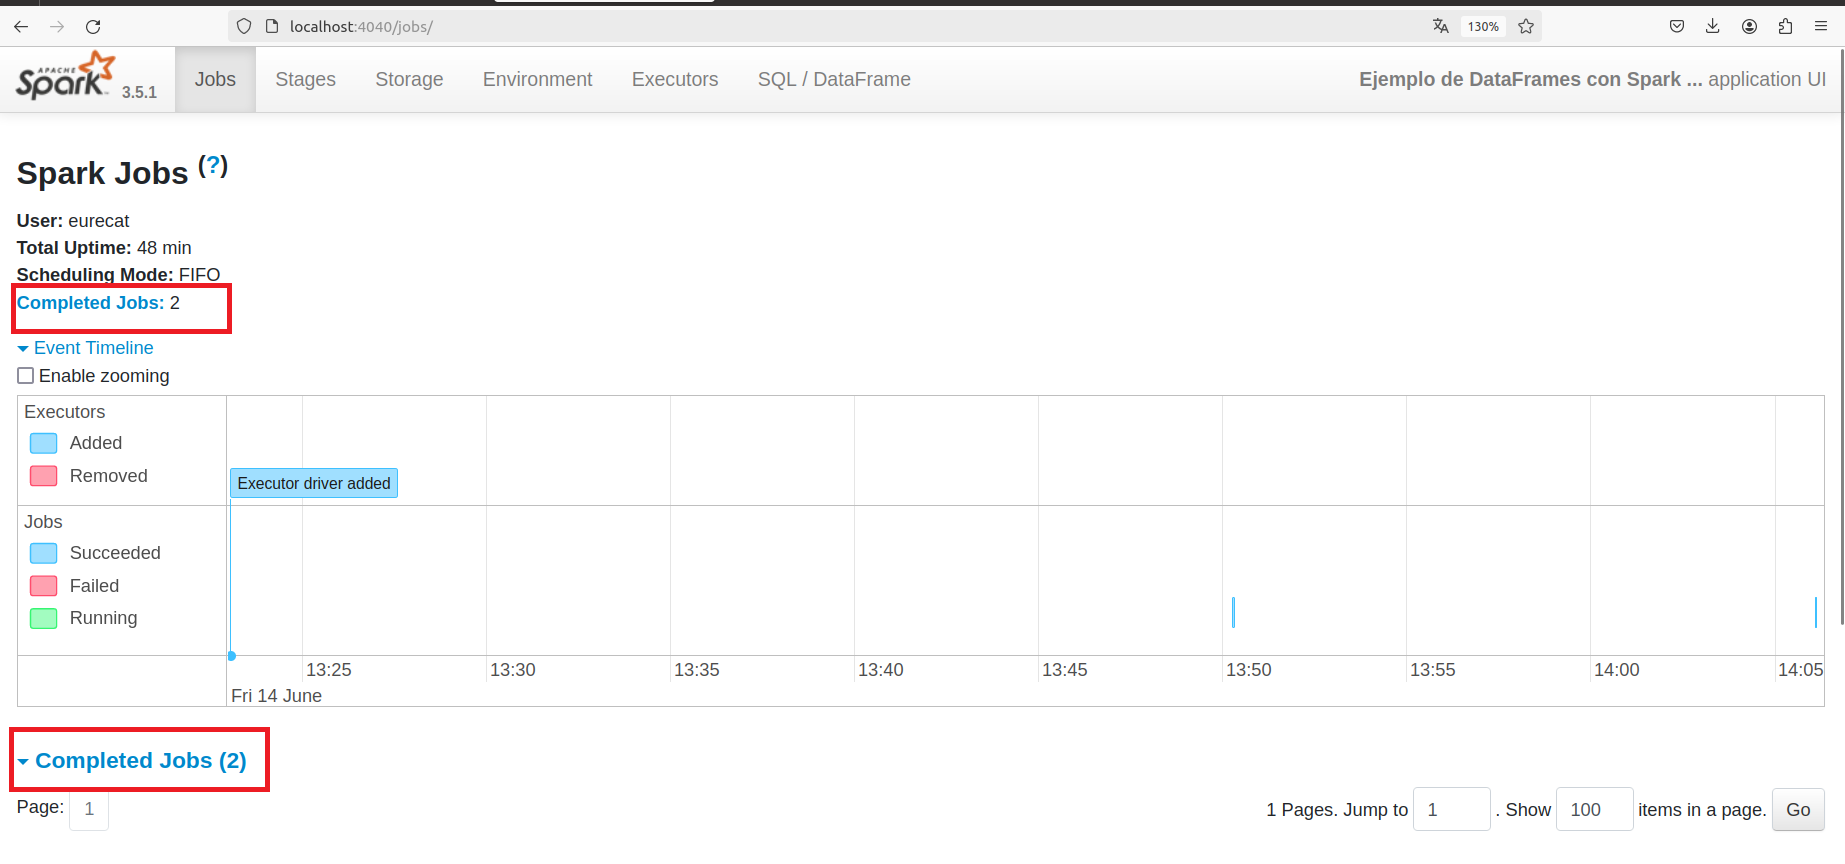

In [33]:
# Filtrar las filas donde el mes del año (Mes_any) es menor a 6
sdf.filter(sdf['Mes_any'] < 6).show(20)

+----------------+--------------+-------------+----------+--------------------+-----------+--------------------+-----------+----------------------+------+-------+-------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+
|Numero_expedient|Codi_districte|Nom_districte|Codi_barri|           Nom_barri|Codi_carrer|          Nom_carrer|Num_postal |Descripcio_dia_setmana|NK_Any|Mes_any|Nom_mes|Dia_mes|Hora_dia|Descripcio_torn|Descripcio_causa_mediata|Coordenada_UTM_X_ED50|Coordenada_UTM_Y_ED50|Longitud_WGS84|Latitud_WGS84|
+----------------+--------------+-------------+----------+--------------------+-----------+--------------------+-----------+----------------------+------+-------+-------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+
| 2023S000699    |            -1|   Desconegut|        -1|          Desconegut|         -1|Rov

In [34]:
# Filtrar las filas donde 'Nom_districte' es igual a 'Eixample'
# Usamos filter para seleccionar las filas que cumplen la condición
sdf.filter(sdf['Nom_districte'] == "Eixample")

sdf.show(20)

# Este código es lo mismo que
#sdf.select('Nom_districte').distinct().show()

+----------------+--------------+-------------+----------+--------------------+-----------+--------------------+-----------+----------------------+------+-------+--------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+
|Numero_expedient|Codi_districte|Nom_districte|Codi_barri|           Nom_barri|Codi_carrer|          Nom_carrer|Num_postal |Descripcio_dia_setmana|NK_Any|Mes_any| Nom_mes|Dia_mes|Hora_dia|Descripcio_torn|Descripcio_causa_mediata|Coordenada_UTM_X_ED50|Coordenada_UTM_Y_ED50|Longitud_WGS84|Latitud_WGS84|
+----------------+--------------+-------------+----------+--------------------+-----------+--------------------+-----------+----------------------+------+-------+--------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+
| 2023S000699    |            -1|   Desconegut|        -1|          Desconegut|         -1|

In [35]:
from pyspark.sql.functions import col

# Crear una nueva columna 'Minutos_desde_medianoche'
# Multiplicamos la columna 'Hora_dia' por 60 para obtener los minutos desde medianoche
sdf = sdf.withColumn('Minutos_desde_medianoche', col('Hora_dia') * 60)

sdf.show(35)



+----------------+--------------+-------------+----------+--------------------+-----------+--------------------+-----------+----------------------+------+-------+--------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+------------------------+
|Numero_expedient|Codi_districte|Nom_districte|Codi_barri|           Nom_barri|Codi_carrer|          Nom_carrer|Num_postal |Descripcio_dia_setmana|NK_Any|Mes_any| Nom_mes|Dia_mes|Hora_dia|Descripcio_torn|Descripcio_causa_mediata|Coordenada_UTM_X_ED50|Coordenada_UTM_Y_ED50|Longitud_WGS84|Latitud_WGS84|Minutos_desde_medianoche|
+----------------+--------------+-------------+----------+--------------------+-----------+--------------------+-----------+----------------------+------+-------+--------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+------------------------+
| 2023S000699   

In [36]:
# Verificar los valores únicos en 'Nom_districte'
sdf.select('Nom_districte').distinct().show()


+-------------------+
|      Nom_districte|
+-------------------+
|             Gràcia|
|         Sant Martí|
|     Horta-Guinardó|
|          Les Corts|
|     Sants-Montjuïc|
|         Nou Barris|
|Sarrià-Sant Gervasi|
|           Eixample|
|         Desconegut|
|        Sant Andreu|
|       Ciutat Vella|
+-------------------+



# Comenzamos con otro ejemplo

In [37]:
from pyspark.sql.functions import col, avg, stddev

# Definimos el primer DataFrame: productos
data = [("P101", "Laptop"), ("P102", "Mouse"), ("P103", "Monitor"), ("P104", "Keyboard"), ("P105", "Printer")] 
columns = ["product_id", "product_name"] 
dataframe_1 = spark.createDataFrame(data, columns) 

In [38]:
# Mostrar el primer DataFrame
print("Primer DataFrame (productos):")
dataframe_1.show()

Primer DataFrame (productos):
+----------+------------+
|product_id|product_name|
+----------+------------+
|      P101|      Laptop|
|      P102|       Mouse|
|      P103|     Monitor|
|      P104|    Keyboard|
|      P105|     Printer|
+----------+------------+



In [39]:
# Definimos el segundo DataFrame: ventas
data = [
    ("P101", 1500), ("P102", 25), ("P103", 300), ("P104", None), ("P105", 200),
    ("P106", 100), ("P107", 400), ("P108", 800), ("P109", None), ("P110", 50),
    ("P111", 75), ("P112", 250), ("P113", 150), ("P114", 700), ("P115", None)
]
columns = ["product_id", "price"]
dataframe_2 = spark.createDataFrame(data, columns)

In [40]:
# Mostrar el segundo DataFrame
print("Segundo DataFrame (ventas):")
dataframe_2.show()

Segundo DataFrame (ventas):
+----------+-----+
|product_id|price|
+----------+-----+
|      P101| 1500|
|      P102|   25|
|      P103|  300|
|      P104| NULL|
|      P105|  200|
|      P106|  100|
|      P107|  400|
|      P108|  800|
|      P109| NULL|
|      P110|   50|
|      P111|   75|
|      P112|  250|
|      P113|  150|
|      P114|  700|
|      P115| NULL|
+----------+-----+



In [41]:
# Unir los dos DataFrames en la columna 'product_id'
combined_df = dataframe_1.join(dataframe_2, on="product_id", how="inner")

In [42]:
# Mostrar el DataFrame combinado
print("DataFrame combinado:")
combined_df.show()

DataFrame combinado:


+----------+------------+-----+
|product_id|product_name|price|
+----------+------------+-----+
|      P101|      Laptop| 1500|
|      P102|       Mouse|   25|
|      P103|     Monitor|  300|
|      P104|    Keyboard| NULL|
|      P105|     Printer|  200|
+----------+------------+-----+



In [43]:
# El precio de un producto no está disponible (None), lo rellenamos con un valor predeterminado, por ejemplo, 50.
filled_df = dataframe_2.fillna({"price": -999}) 

In [44]:
# Mostrar el DataFrame con los valores nulos rellenados
print("DataFrame con valores nulos rellenados:")
filled_df.show()

DataFrame con valores nulos rellenados:


+----------+-----+
|product_id|price|
+----------+-----+
|      P101| 1500|
|      P102|   25|
|      P103|  300|
|      P104| -999|
|      P105|  200|
|      P106|  100|
|      P107|  400|
|      P108|  800|
|      P109| -999|
|      P110|   50|
|      P111|   75|
|      P112|  250|
|      P113|  150|
|      P114|  700|
|      P115| -999|
+----------+-----+



# Otro ejemplo

In [45]:
# Suponiendo que tenemos un DataFrame 'sdf' de ventas con columnas 'product_id', 'quantity', 'price'
# Definimos los datos de ventas, incluyendo algunos precios nulos rellenados con -999

data = [
    ("P101", 2, 1500), 
    ("P102", 5, 25), 
    ("P103", 1, 300), 
    ("P104", 3, 400),  
    ("P105", 4, 200),
    ("P106", 2, 100), 
    ("P107", 5, 400), 
    ("P108", 1, 800), 
    ("P109", 3, 400),  
    ("P110", 4, 400),  
    ("P111", 2, 75), 
    ("P112", 5, 250), 
    ("P113", 3, 150), 
    ("P114", 4, 700), 
    ("P115", 5, 400)   
]
columns = ["product_id", "quantity", "price"]
sdf = spark.createDataFrame(data, columns)

In [46]:
# Mostrar el DataFrame de ventas
print("DataFrame de ventas:")
sdf.show()

DataFrame de ventas:
+----------+--------+-----+
|product_id|quantity|price|
+----------+--------+-----+
|      P101|       2| 1500|
|      P102|       5|   25|
|      P103|       1|  300|
|      P104|       3|  400|
|      P105|       4|  200|
|      P106|       2|  100|
|      P107|       5|  400|
|      P108|       1|  800|
|      P109|       3|  400|
|      P110|       4|  400|
|      P111|       2|   75|
|      P112|       5|  250|
|      P113|       3|  150|
|      P114|       4|  700|
|      P115|       5|  400|
+----------+--------+-----+



In [47]:
# Calcular el precio promedio y el desvío estándar por cantidad de productos

# Agrupamos por 'quantity' y calculamos el promedio y desvío estándar de 'price'

print("Precio promedio y desvío estándar por cantidad de productos:")
sdf.groupby('quantity').agg(
    avg(col('price')).alias('average_price'),
    stddev(col('price')).alias('stddev_price')
).show()

Precio promedio y desvío estándar por cantidad de productos:


+--------+-----------------+------------------+
|quantity|    average_price|      stddev_price|
+--------+-----------------+------------------+
|       5|           268.75|177.21808598447282|
|       1|            550.0| 353.5533905932738|
|       2|558.3333333333334| 815.6030488744714|
|       3|316.6666666666667|144.33756729740642|
|       4|433.3333333333333|251.66114784235833|
+--------+-----------------+------------------+



In [48]:
# Contar el número de productos por cantidad y ordenar en orden descendente

# Agrupamos por 'quantity' y contamos el número de 'price' en cada grupo, luego ordenamos

print("Número de productos por cantidad, ordenados:")
sdf.groupby(['quantity']).agg({"price": "count"}).sort("count(price)", ascending=False).show()


Número de productos por cantidad, ordenados:


+--------+------------+
|quantity|count(price)|
+--------+------------+
|       5|           4|
|       2|           3|
|       3|           3|
|       4|           3|
|       1|           2|
+--------+------------+



In [49]:
# Crear una nueva columna 'total_value' que es 'quantity' * 'price' y ordenar en orden descendente por 'total_value'

# Calculamos 'total_value' como 'quantity' * 'price' y ordenamos en orden descendente

print("DataFrame con nueva columna 'total_value' (cantidad * precio) ordenado por 'total_value':")
sdf.withColumn('total_value', sdf['quantity'] * sdf['price']).sort('total_value', ascending=False).show()

DataFrame con nueva columna 'total_value' (cantidad * precio) ordenado por 'total_value':


+----------+--------+-----+-----------+
|product_id|quantity|price|total_value|
+----------+--------+-----+-----------+
|      P101|       2| 1500|       3000|
|      P114|       4|  700|       2800|
|      P107|       5|  400|       2000|
|      P115|       5|  400|       2000|
|      P110|       4|  400|       1600|
|      P112|       5|  250|       1250|
|      P109|       3|  400|       1200|
|      P104|       3|  400|       1200|
|      P108|       1|  800|        800|
|      P105|       4|  200|        800|
|      P113|       3|  150|        450|
|      P103|       1|  300|        300|
|      P106|       2|  100|        200|
|      P111|       2|   75|        150|
|      P102|       5|   25|        125|
+----------+--------+-----+-----------+



In [50]:
# Cerrar la sesión de Spark
# Es una buena práctica cerrar la sesión de Spark al final del script para liberar recursos
spark.stop()

###   Recursos adicionales

- [Tutorial de Pyspark: Primeros pasos con Pyspark](hhttps://www.datacamp.com/es/tutorial/pyspark-tutorial-getting-started-with-pyspark)




###   Tabla de Comandos que Generan Cambios en la Interfaz de PySpark


Esta tabla proporciona una guía clara y concisa sobre los comandos comunes en PySpark que generan cambios en la interfaz de usuario, junto con sus explicaciones y ejemplos de uso:




| Comando                              | Explicación                                                                                               | Ejemplo                                                     |
|--------------------------------------|-----------------------------------------------------------------------------------------------------------|-------------------------------------------------------------|
| `show()`                             | Muestra las primeras filas del DataFrame.                                                                 | `sdf.show(5)`                                               |
| `groupBy().agg()`                    | Agrupa los datos por una columna y realiza operaciones de agregación.                                     | `sdf.groupBy('quantity').agg({'price': 'avg'}).show()`      |
| `filter()`                           | Filtra las filas del DataFrame según una condición.                                                       | `sdf.filter(sdf['quantity'] > 2).show()`                    |
| `select()`                           | Selecciona columnas específicas del DataFrame.                                                            | `sdf.select('product_id', 'price').show()`                  |
| `join()`                             | Une dos DataFrames basados en una columna común.                                                          | `sdf1.join(sdf2, sdf1['product_id'] == sdf2['product_id']).show()` |
| `withColumn()`                       | Añade o reemplaza una columna en el DataFrame.                                                            | `sdf.withColumn('total_value', sdf['quantity'] * sdf['price']).show()` |
| `sort()`                             | Ordena el DataFrame por una o más columnas.                                                               | `sdf.sort('price', ascending=False).show()`                 |
| `distinct()`                         | Devuelve un DataFrame con filas únicas, eliminando duplicados.                                            | `sdf.select('product_id').distinct().show()`                |
| `cache()`                            | Almacena el DataFrame en la memoria caché para mejorar el rendimiento en futuras operaciones.              | `sdf.cache()`                                               |
| `unpersist()`                        | Elimina el DataFrame de la memoria caché.                                                                 | `sdf.unpersist()`                                           |
| `count()`                            | Cuenta el número de filas en el DataFrame.                                                                | `sdf.count()`                                               |
| `spark.stop()`                       | Detiene la sesión activa de Spark y libera los recursos asociados.                                         | `spark.stop()`                                              |
